# Anderson acceleration effectiveness on FedAvg

The experiment is aimed to find the effectiveness of anderson acceleration while using Fedavg algorithm. In this experiment, first the feature 'age' which is linearly related to the medical coverages for the non-smokers is discovered while doing EDA on the data.

Data is available at "https://www.kaggle.com/code/hely333/eda-regression/data". Some of the EDA is taken from "https://www.kaggle.com/code/hely333/eda-regression/notebook".

Firstly, it is shown how anderson acceleration can improves the performance by speeding up the convergenece time and it is even better than the SGD regressor of the sklearn package. Then the data is trained using fedavg algorithm and is shown that the anderson acceleration improves the convergence time even while using fedavg algorithm. Finally, a comparison of the performances for different memory sizes is made and is shown it improves as we improve the memory buffer size

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns

In [2]:
data = pd.read_csv('data/insurance.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.sex = le.fit_transform(data.sex)

In [4]:
data.smoker = le.fit_transform(data.smoker)
data.region = le.fit_transform(data.region)

In [5]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

C:\Users\mssid\AppData\Local\Temp\ipykernel_17684\3731663680.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),


<AxesSubplot:>

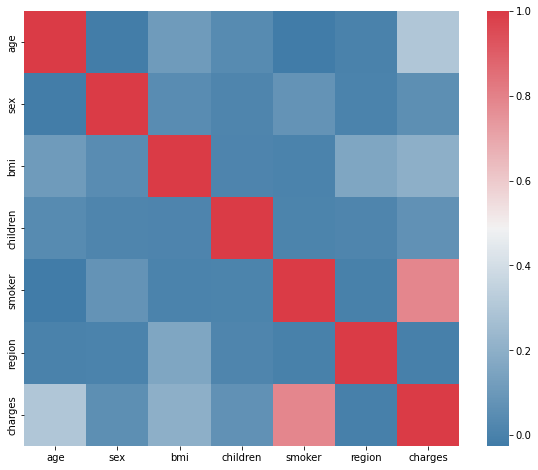

In [6]:
f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [7]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [8]:
import scipy.special

In [9]:
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

In [10]:
p = figure(title="Distribution of charges",tools="save",
            background_fill_color="#E8DDCB")

In [11]:
hist, edges = np.histogram(data.charges)

In [12]:
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'
show(p)

C:\Users\mssid\anaconda3\envs\FL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mssid\anaconda3\envs\FL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of charges for non-smokers')

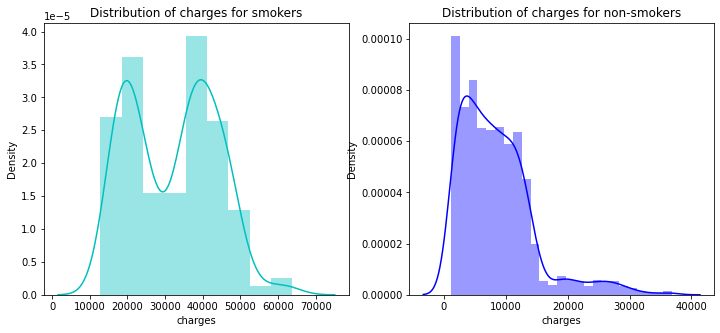

In [13]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

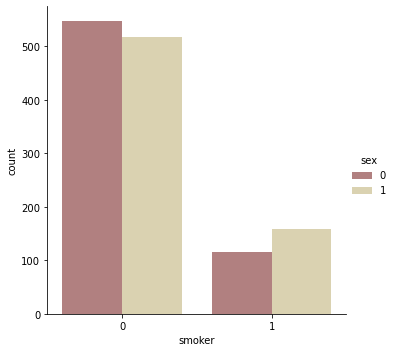

In [14]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

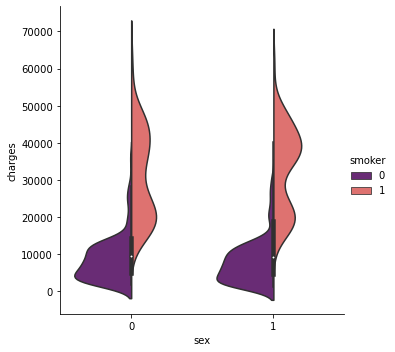

In [15]:
sns.catplot(x="sex", y="charges", hue="smoker", split=True,
            kind="violin", data=data, palette = 'magma')

<AxesSubplot:title={'center':'Box plot for charges'}, xlabel='charges', ylabel='smoker'>

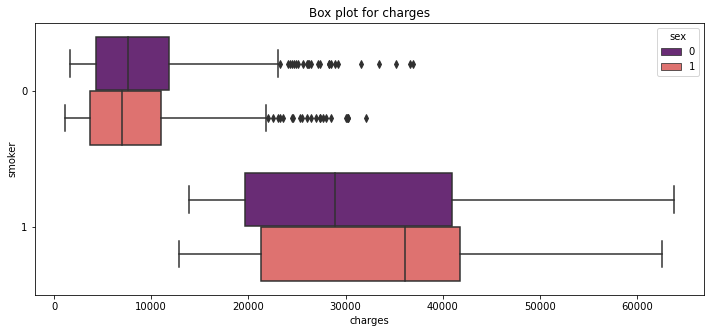

In [16]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges")
sns.boxplot(y="smoker", x="charges",hue="sex", data =  data , orient="h", palette = 'magma')

C:\Users\mssid\anaconda3\envs\FL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


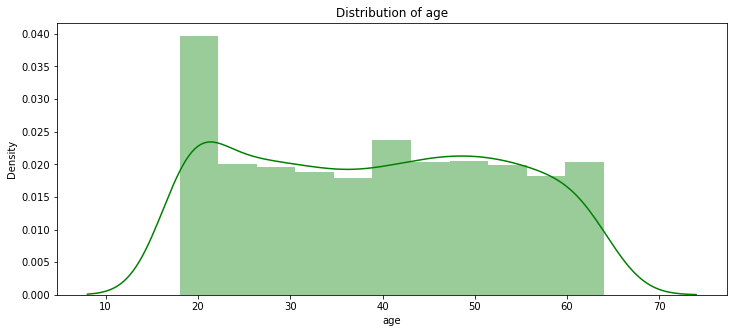

In [17]:
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

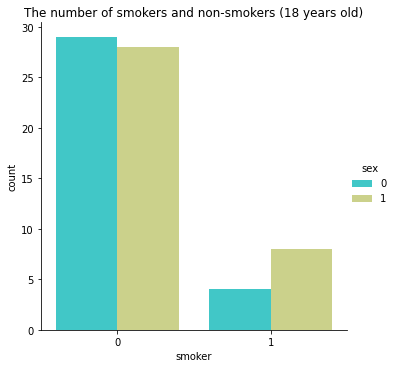

In [18]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)])
pl.title("The number of smokers and non-smokers (18 years old)")

<AxesSubplot:title={'center':'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

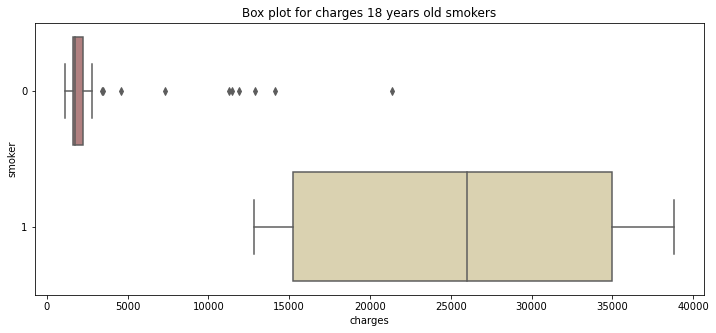

In [19]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

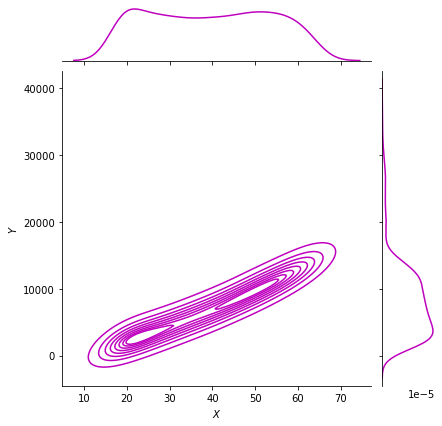

In [20]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="kde", color="m")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

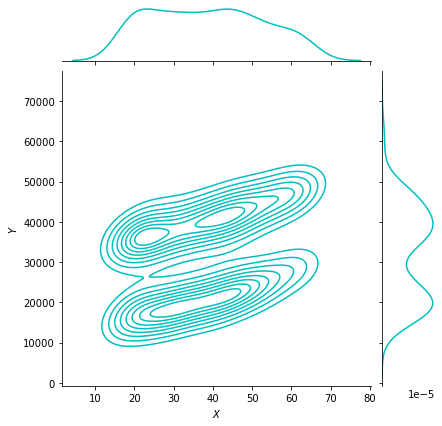

In [21]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 1)],kind="kde", color="c")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

In [22]:
#non - smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 0)].age,y=data[(data.smoker == 0)].charges, size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)

show(p)

In [23]:
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 1)].age,y=data[(data.smoker == 1)].charges, size=7, line_color="navy", fill_color="red", fill_alpha=0.9)
show(p)

C:\Users\mssid\anaconda3\envs\FL\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Smokers and non-smokers')

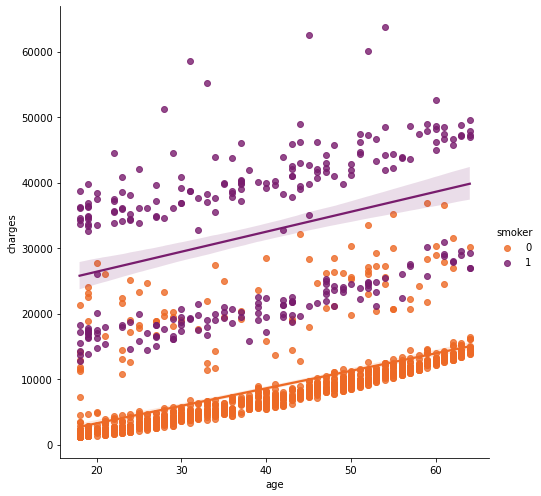

In [24]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

C:\Users\mssid\anaconda3\envs\FL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


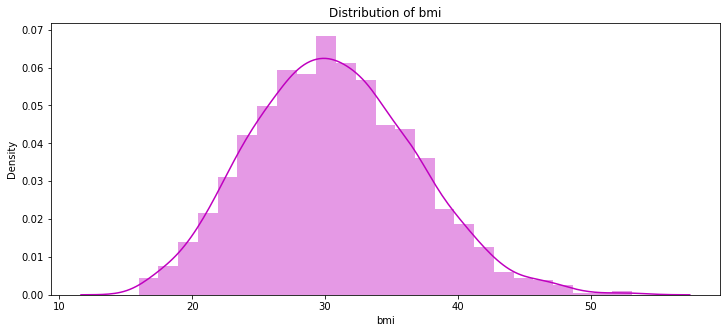

In [25]:
pl.figure(figsize=(12,5))
pl.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

C:\Users\mssid\anaconda3\envs\FL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


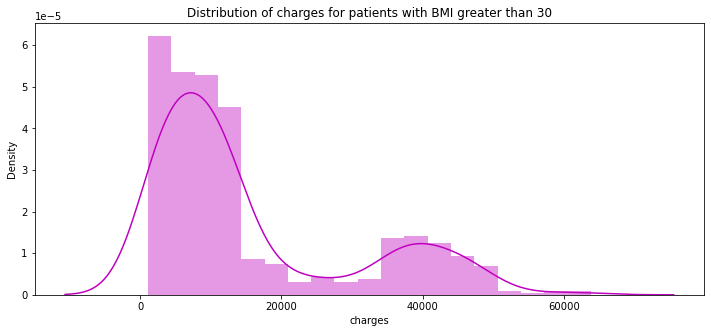

In [26]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

C:\Users\mssid\anaconda3\envs\FL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


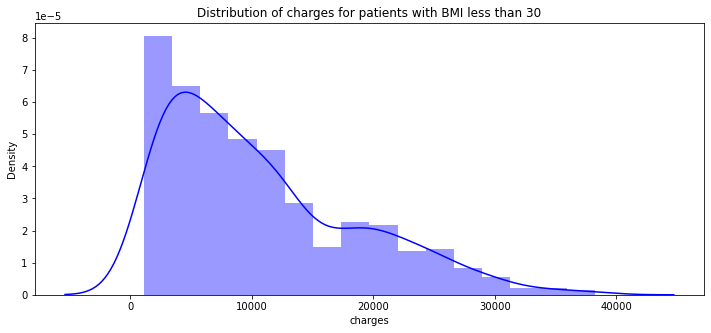

In [27]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

Text(0.5, 1.0, 'Distribution of bmi and charges')

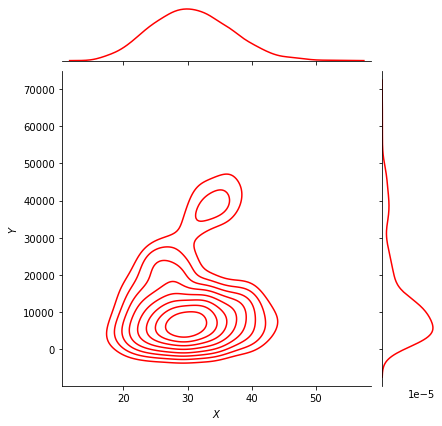

In [28]:
g = sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')

C:\Users\mssid\anaconda3\envs\FL\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


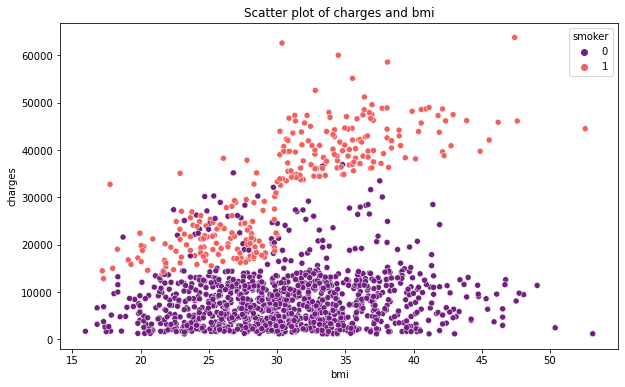

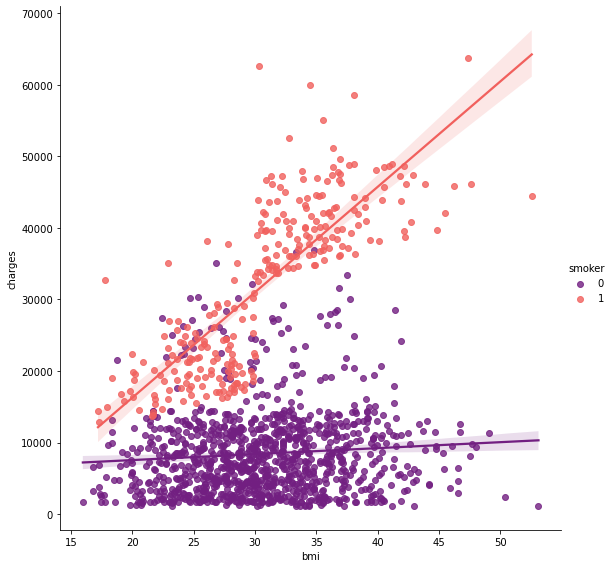

In [29]:
pl.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma', size = 8)

C:\Users\mssid\anaconda3\envs\FL\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


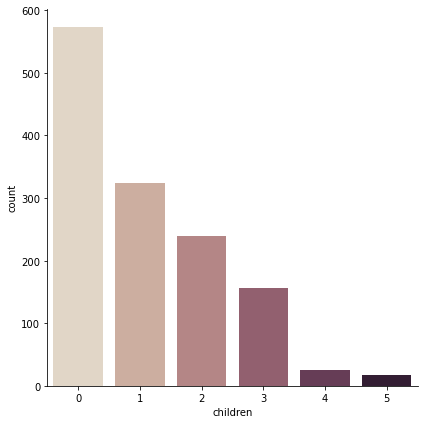

In [30]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)

C:\Users\mssid\anaconda3\envs\FL\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

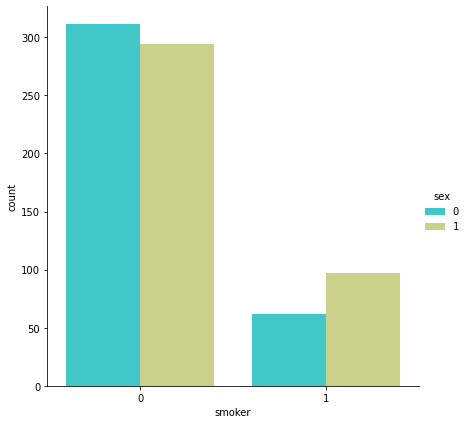

In [31]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data[(data.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')

In [32]:
data_nonsmoker = data[data.smoker == 0]

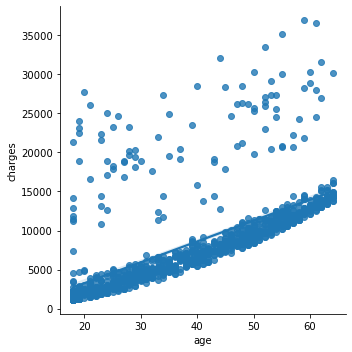

In [33]:
# We can see that the relation is linear, we will attempt to achieve this with regression
sns.lmplot(x="age", y="charges", data=data_nonsmoker)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [35]:
X = data_nonsmoker['age']
Y = data_nonsmoker['charges']

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1)

In [37]:
scaler = StandardScaler().fit(np.array(x_train).reshape(-1,1))
x_train = scaler.transform(np.array(x_train).reshape(-1,1))
x_test= scaler.transform(np.array(x_test).reshape(-1,1))
scaler = StandardScaler().fit(np.array(y_train).reshape(-1,1))
y_train = scaler.transform(np.array(y_train).reshape(-1,1))
y_test= scaler.transform(np.array(y_test).reshape(-1,1))

In [63]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(eta0=0.001, learning_rate='constant', max_iter=1000)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
f'mse = {mean_squared_error(y_test,y_pred)}'

C:\Users\mssid\anaconda3\envs\FL\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'mse = 0.3266675951682319'

In [64]:
reg.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

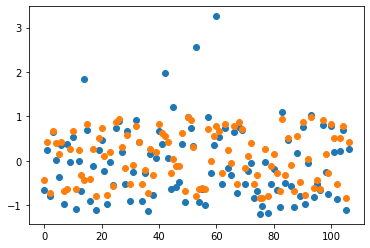

In [39]:
import matplotlib.pyplot as plt
plt.scatter(range(len(y_test)),y_test)
plt.scatter(range(len(y_test)),y_pred)
plt.show()

In [40]:
train_data = pd.DataFrame({'x_train':np.ravel(x_train), 'y_train':np.ravel(y_train)})

In [98]:
# Linear regression with SGD
iters = 1000
lr = 0.001
alpha = 0.0001 # regularization term
w = 0
b = 0
k = 10
mse_acc = np.zeros(iters)
pred = np.zeros(len(np.ravel(x_test)))
for i in range(iters):
    temp = train_data.sample(k)
    
    x = list(temp.x_train)
    y = list(temp.y_train)
    
    w_grad = 0
    b_grad = 0
    
    for j in range(k):
        pred_temp = x[j]*w+b
        w_grad += -2*x[j]*(y[j]-pred_temp)+2*alpha
        b_grad += -2*(y[j]-pred_temp)
        
    w = w-lr*(w_grad/k)
    b = b-lr*(b_grad/k)
    
    for ind in range(len(np.ravel(x_test))):
        pred[ind] = w*x_test[ind]+b
    
    mse_acc[i] = mean_squared_error(pred,y_test)

In [99]:
mean_squared_error(pred,y_test)

0.3281897098954484

In [100]:
r2_score(y_test,pred)

0.5107276455834007

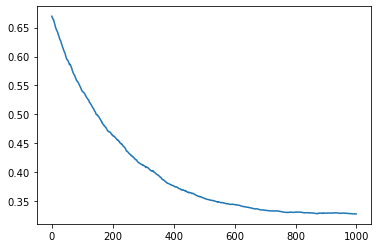

In [101]:
plt.plot(mse_acc)
plt.show()

In [96]:
# Anderson acceleration
# Linear regression with SGD
iters = 1000
lr = 0.001
alpha = 0.0001 # regularization term
mem = 2
w = 0
b = 0
prev_wgrad = 0
prev_bgrad = 0
k = 10
mse_acc_aa = np.zeros(iters)
pred = np.zeros(len(np.ravel(x_test)))
for i in range(iters):
    temp = train_data.sample(k)
    
    x = list(temp.x_train)
    y = list(temp.y_train)
    
    w_grad = 0
    b_grad = 0
    
    for j in range(k):
        pred_temp = x[j]*w+b
        w_grad += -2*x[j]*(y[j]-pred_temp)+2*alpha
        b_grad += -2*(y[j]-pred_temp)
        
    w = w-lr*(w_grad/k)-lr*prev_wgrad
    b = b-lr*(b_grad/k)-lr*prev_bgrad
    prev_wgrad = w_grad/k
    prev_bgrad = b_grad/k
    
    for ind in range(len(np.ravel(x_test))):
        pred[ind] = w*x_test[ind]+b
    
    mse_acc_aa[i] = mean_squared_error(pred,y_test)

mse:  0.3281897098954484
r2:  0.5107276455834007


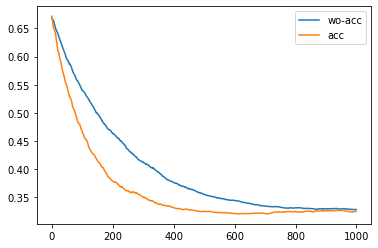

In [110]:
print("mse: ", mean_squared_error(pred,y_test))
print("r2: ", r2_score(y_test,pred))
plt.plot(mse_acc, label= "wo-acc")
plt.plot(mse_acc_aa, label= "acc")
plt.legend()
plt.show()

In [130]:
# Use FedAvg to model

# Divide the data between 10 clients
client_data = {ind: train_data[int(ind*len(train_data)/10):int((ind+1)*len(train_data)/10)] for ind in range(10)}

# function to train the local SGD linear regression model

def client_model(ind, w, b):
    local_iters = 10
    lr = 0.001
    alpha = 0.0001 # Lasso regularization term
    k = 10
    for i in range(local_iters):
        temp = client_data[ind].sample(k)

        x = list(temp.x_train)
        y = list(temp.y_train)

        w_grad = 0
        b_grad = 0

        for j in range(k):
            pred_temp = x[j]*w+b
            w_grad += -2*x[j]*(y[j]-pred_temp)+ alpha
            b_grad += -2*(y[j]-pred_temp)

        w = w-lr*(w_grad/k)
        b = b-lr*(b_grad/k)
    return w,b

# Fedavg global model
global_iters = 100
num_clients = 10
w = np.zeros(num_clients)
b = np.zeros(num_clients)
mse_acc_fed = np.zeros(global_iters)
pred = np.zeros(len(np.ravel(x_test)))
for i in range(global_iters):
    for j in range(num_clients):
        w[j], b[j] = client_model(j, w[j], b[j])
    w = np.ones(num_clients)*(sum(w)/num_clients)
    b = np.ones(num_clients)*(sum(b)/num_clients)
    
    for ind_test in range(len(np.ravel(x_test))):
        pred[ind_test] = w[0]*x_test[ind_test]+b[0]
    
    mse_acc_fed[i] = mean_squared_error(pred,y_test)

mse:  0.3264177720470714
r2:  0.5133692890500148


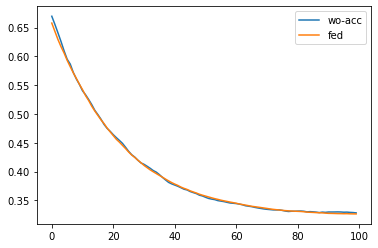

In [139]:
print("mse: ", mean_squared_error(pred,y_test))
print("r2: ", r2_score(y_test,pred))
plt.plot(mse_acc[0::10], label= "wo-acc")
plt.plot(mse_acc_fed, label= "fed")
plt.legend()
plt.show()

In [144]:
# Bring everything together, Run Fedavg with anderson acceleration

# Use the same client data distribution used without AA

def client_model_aa(ind, w, b):
    local_iters = 10
    lr = 0.001
    alpha = 0.0001 # Lasso regularization term
    k = 10
    prev_wgrad = 0
    prev_bgrad = 0
    for i in range(local_iters):
        temp = client_data[ind].sample(k)

        x = list(temp.x_train)
        y = list(temp.y_train)

        w_grad = 0
        b_grad = 0

        for j in range(k):
            pred_temp = x[j]*w+b
            w_grad += -2*x[j]*(y[j]-pred_temp)+ alpha
            b_grad += -2*(y[j]-pred_temp)

        w = w-lr*(w_grad/k)-lr*prev_wgrad
        b = b-lr*(b_grad/k)-lr*prev_bgrad
        prev_wgrad = w_grad/k
        prev_bgrad = b_grad/k
        
    return w,b

# Fedavg global model
global_iters = 100
num_clients = 10
w = np.zeros(num_clients)
b = np.zeros(num_clients)
mse_acc_fed_aa = np.zeros(global_iters)
pred = np.zeros(len(np.ravel(x_test)))
for i in range(global_iters):
    for j in range(num_clients):
        w[j], b[j] = client_model_aa(j, w[j], b[j])
    w = np.ones(num_clients)*(sum(w)/num_clients)
    b = np.ones(num_clients)*(sum(b)/num_clients)
    
    for ind_test in range(len(np.ravel(x_test))):
        pred[ind_test] = w[0]*x_test[ind_test]+b[0]
    
    mse_acc_fed_aa[i] = mean_squared_error(pred,y_test)

mse:  0.3268435644202374
r2:  0.5127345085232946


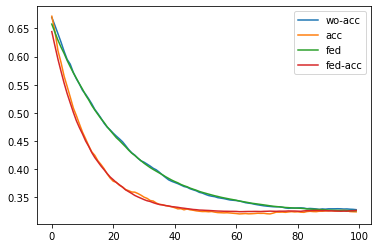

In [148]:
print("mse: ", mean_squared_error(pred,y_test))
print("r2: ", r2_score(y_test,pred))
plt.plot(mse_acc[0::10], label= "wo-acc")
plt.plot(mse_acc_aa[0::10], label= "acc")
plt.plot(mse_acc_fed, label= "fed")
plt.plot(mse_acc_fed_aa, label= "fed-acc")
plt.legend()
plt.show()

In [192]:
# mem size is variable

# Use the same client data distribution used without AA

def client_model_aa_mem(ind, w, b, mem):
    local_iters = 10
    lr = 0.001
    alpha = 0.0001 # Lasso regularization term
    k = 10
    prev_wgrad = np.zeros(mem)
    prev_bgrad = np.zeros(mem)
    for i in range(local_iters):
        temp = client_data[ind].sample(k)

        x = list(temp.x_train)
        y = list(temp.y_train)

        w_grad = 0
        b_grad = 0

        for j in range(k):
            pred_temp = x[j]*w+b
            w_grad += -2*x[j]*(y[j]-pred_temp)+ alpha
            b_grad += -2*(y[j]-pred_temp)

        w = w-lr*(w_grad/k)-lr*sum(prev_wgrad)
        b = b-lr*(b_grad/k)-lr*sum(prev_bgrad)
        prev_wgrad = np.delete(prev_wgrad,mem-1)
        prev_wgrad = np.insert(prev_wgrad,0,w_grad/k)
        prev_bgrad = np.delete(prev_bgrad,mem-1)
        prev_bgrad = np.insert(prev_bgrad,0,b_grad/k)      
    return w,b

# Fedavg global model
global_iters = 100
num_clients = 10
mem = 9
w = np.zeros(num_clients)
b = np.zeros(num_clients)
mse_acc_fed_aa_mem_9 = np.zeros(global_iters)
pred = np.zeros(len(np.ravel(x_test)))
for i in range(global_iters):
    for j in range(num_clients):
        w[j], b[j] = client_model_aa_mem(j, w[j], b[j], mem)
    w = np.ones(num_clients)*(sum(w)/num_clients)
    b = np.ones(num_clients)*(sum(b)/num_clients)
    
    for ind_test in range(len(np.ravel(x_test))):
        pred[ind_test] = w[0]*x_test[ind_test]+b[0]
    
    mse_acc_fed_aa_mem_9[i] = mean_squared_error(pred,y_test)

mse:  0.3298395002264957
r2:  0.5082681022911311


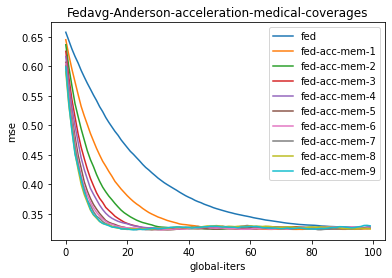

In [198]:
print("mse: ", mean_squared_error(pred,y_test))
print("r2: ", r2_score(y_test,pred))
plt.plot(mse_acc_fed, label= "fed")
plt.plot(mse_acc_fed_aa_mem_1, label= "fed-acc-mem-1")
plt.plot(mse_acc_fed_aa_mem_2, label= "fed-acc-mem-2")
plt.plot(mse_acc_fed_aa_mem_3, label= "fed-acc-mem-3")
plt.plot(mse_acc_fed_aa_mem_4, label= "fed-acc-mem-4")
plt.plot(mse_acc_fed_aa_mem_5, label= "fed-acc-mem-5")
plt.plot(mse_acc_fed_aa_mem_6, label= "fed-acc-mem-6")
plt.plot(mse_acc_fed_aa_mem_7, label= "fed-acc-mem-7")
plt.plot(mse_acc_fed_aa_mem_8, label= "fed-acc-mem-8")
plt.plot(mse_acc_fed_aa_mem_9, label= "fed-acc-mem-9")
plt.legend()
plt.xlabel('global-iters')
plt.ylabel('mse')
plt.title("Fedavg-Anderson-acceleration-medical-coverages")
plt.savefig("Anderson_acceleration_medical_coverage.png")
plt.show()